### All the packages that will be needed for natural language processing

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import preprocessor as prepro # text prepro
import tqdm #progress bar
from gensim.models import LdaModel, CoherenceModel
from gensim import corpora
import seaborn as sns
import spacy #spacy for quick language prepro
nlp = spacy.load('en_core_web_sm') #instantiating English module

# sampling, splitting
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


# loading ML libraries
from sklearn.pipeline import make_pipeline #pipeline creation
from sklearn.feature_extraction.text import TfidfVectorizer #transforms text to sparse matrix
from sklearn.linear_model import LogisticRegression #Logit model
from sklearn.metrics import classification_report #that's self explanatory
from sklearn.decomposition import TruncatedSVD #dimensionality reduction
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import altair as alt #viz

#explainability
import eli5
from eli5.lime import TextExplainer

# topic modeling

from gensim.corpora.dictionary import Dictionary # Import the dictionary builder
from gensim.models import LdaMulticore # we'll use the faster multicore version of LDA

# Import pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

%matplotlib inline
pyLDAvis.enable_notebook()

In [2]:
# prepro settings
# This is prob not relevant, since it has to do with tweets? 
# prepro.set_options(prepro.OPT.URL, prepro.OPT.NUMBER, prepro.OPT.RESERVED, prepro.OPT.MENTION, prepro.OPT.SMILEY)

### Loading and appending the datasets

In [3]:
scopus2022 = pd.read_csv('scopus 2022 2021.csv',  sep = ',')
scopus = pd.read_csv('scopus.csv',  sep = ',')

In [4]:
data = scopus2022.append(scopus, ignore_index=True)

C:\Users\maart\AppData\Local\Temp\ipykernel_19624\3402760882.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = scopus2022.append(scopus, ignore_index=True)


In [5]:
data

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Yang T., Zhang X.",57907798100;56342888200;,FinTech adoption and financial inclusion: Evid...,2022,Journal of Banking and Finance,145,NaN,106668,NaN,NaN,...,NaN,JBFID,NaN,English,J. Bank. Financ.,Article,Final,NaN,Scopus,2-s2.0-85138806241
1,"Wang X., Wang Y., Zhao Y.",57193015825;57901727900;57901783600;,Financial permeation and rural poverty reducti...,2022,China Economic Review,76,NaN,101863,NaN,NaN,...,NaN,NaN,NaN,English,China Econ. Rev.,Article,Final,NaN,Scopus,2-s2.0-85138589769
2,"Dzandu M.D., Hanu C., Amegbe H.",56590001600;57201152816;57194904537;,Gamification of mobile money payment for gener...,2022,Technological Forecasting and Social Change,185,NaN,122049,NaN,NaN,...,NaN,NaN,NaN,English,Technol. Forecast. Soc. Change,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-85138450268
3,"Grassi L., Fantaccini S.",57192656409;57895835500;,An overview of Fintech applications to solve t...,2022,Financial Innovation,8,1,84,NaN,NaN,...,NaN,NaN,NaN,English,Financial Innov.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85138286241
4,"DeFusco A.A., Tang H., Yannelis C.",57193852071;57890330600;55413678100;,Measuring the welfare cost of asymmetric infor...,2022,Journal of Financial Economics,146,3,NaN,821,840.0,...,NaN,JFECD,NaN,English,J. Financ. Econ.,Article,Final,NaN,Scopus,2-s2.0-85138101180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,Fayard E.H.,35072693600;,ACC pressure cleaning,2010,"Power Engineering (Barrington, Illinois)",114,5,NaN,22,NaN,...,NaN,POENA,NaN,English,Power Eng. Barrington Ill,Short Survey,Final,NaN,Scopus,2-s2.0-77953829082
3396,"Dassanayake M.M.K., Tilakarathne C.",57221353725;55762978100;,Predicting trading signals of Sri Lankan stock...,2010,"Technological Developments in Networking, Educ...",NaN,NaN,NaN,269,273,...,9789048191505,NaN,NaN,English,"Technol. Dev. Networking, Educ. Autom.",Conference Paper,Final,NaN,Scopus,2-s2.0-84878897261
3397,Hao H.-N.,36617357100;,Notice of Retraction: Short-term forecasting o...,2010,Proceedings - 2010 6th International Conferenc...,4,NaN,5584528,1838,1841,...,9781424459612,NaN,NaN,English,"Proc. - Int. Conf. Nat. Comput., ICNC",Retracted,Final,NaN,Scopus,2-s2.0-78149350510
3398,"Ma Z.-X., Zhang W.",55479146300;56621528900;,Notice of Retraction: An discrimination resear...,2010,ICAMS 2010 - Proceedings of 2010 IEEE Internat...,3,NaN,5553273,116,119,...,9781424469291,NaN,NaN,English,ICAMS - Proc. IEEE Int. Conf. Adv. Manage. Sci.,Retracted,Final,NaN,Scopus,2-s2.0-77957273781


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3400 entries, 0 to 3399
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        3400 non-null   object 
 1   Author(s) ID                   3399 non-null   object 
 2   Title                          3400 non-null   object 
 3   Year                           3400 non-null   int64  
 4   Source title                   3400 non-null   object 
 5   Volume                         2320 non-null   object 
 6   Issue                          1426 non-null   object 
 7   Art. No.                       1051 non-null   object 
 8   Page start                     2336 non-null   object 
 9   Page end                       2326 non-null   object 
 10  Page count                     38 non-null     float64
 11  Cited by                       2164 non-null   float64
 12  DOI                            2972 non-null   o

In [7]:
data.describe(include='object')


,Authors,Author(s) ID,Title,Source title,Volume,Issue,Art. No.,Page start,Page end,DOI,...,ISSN,ISBN,CODEN,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
count,3400,3399,3400,3400,2320,1426,1051,2336,2326,2972,...,2540,1174,276,3400,3396,3400,3400,1097,3400,3400
unique,3167,3156,3389,1455,495,81,1023,1013,1369,2969,...,949,821,124,4,1429,13,2,7,1,3400
top,[No author name available],[No author id available],Introduction,ACM International Conference Proceeding Series,8,1,8,1,20,10.1142/9789811235825_0003,...,21945357,9781799832591; 9781799832577,JEBUD,English,ACM Int. Conf. Proc. Ser.,Article,Final,"All Open Access, Gold",Scopus,2-s2.0-85138806241
freq,58,58,4,93,95,322,4,158,11,2,...,53,15,15,3395,93,1770,3241,278,3400,1


In [8]:
data['Author Keywords']

0       Consumption; Consumption inequality; Credit co...
1       Bank branch expansion; Financial permeation; F...
2       Customer value; FinTech; Gamification; Marketi...
3       Crowdfunding; Fintech; Health crowdfunding; He...
4       Asymmetric information; Consumer credit; Exper...
                              ...                        
3395                                                  NaN
3396                                                  NaN
3397    Genetic-neural network; Short-term forecasting...
3398    Discrimination analysis; Insider trading; Mark...
3399    correlation dimension; KSE-100 index returns; ...
Name: Author Keywords, Length: 3400, dtype: object

In [9]:
data = data[['Authors', 'Author(s) ID','Title', 'Abstract','Year', 'Source title', 'Author Keywords']]

In [10]:
data['Author Keywords'] = data['Author Keywords'].astype({'Author Keywords':'string'})

C:\Users\maart\AppData\Local\Temp\ipykernel_19624\3149525087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Author Keywords'] = data['Author Keywords'].astype({'Author Keywords':'string'})


In [11]:
data['Author Keywords']

0       Consumption; Consumption inequality; Credit co...
1       Bank branch expansion; Financial permeation; F...
2       Customer value; FinTech; Gamification; Marketi...
3       Crowdfunding; Fintech; Health crowdfunding; He...
4       Asymmetric information; Consumer credit; Exper...
                              ...                        
3395                                                 <NA>
3396                                                 <NA>
3397    Genetic-neural network; Short-term forecasting...
3398    Discrimination analysis; Insider trading; Mark...
3399    correlation dimension; KSE-100 index returns; ...
Name: Author Keywords, Length: 3400, dtype: string

In [12]:
data.dropna(inplace = True)

C:\Users\maart\AppData\Local\Temp\ipykernel_19624\339833404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace = True)


In [13]:
data['Author Keywords'].head()

0    Consumption; Consumption inequality; Credit co...
1    Bank branch expansion; Financial permeation; F...
2    Customer value; FinTech; Gamification; Marketi...
3    Crowdfunding; Fintech; Health crowdfunding; He...
4    Asymmetric information; Consumer credit; Exper...
Name: Author Keywords, dtype: string

In [14]:
data['Author Keywords'].isnull().value_counts()

False    2781
Name: Author Keywords, dtype: int64

#### Preprocessing the data for Author Keywords column

In [15]:
# run progress bar and clean up using spacy but without some heavy parts of the pipeline

clean_text = []

pbar = tqdm.tqdm(total=len(data['Author Keywords']),position=0, leave=True)

for text in nlp.pipe(data['Author Keywords'], disable=["tagger", "parser", "ner"]):

  txt = [token.lemma_.lower() for token in text 
         if token.is_alpha 
         and not token.is_stop 
         and not token.is_punct]

  clean_text.append(" ".join(txt))

  pbar.update(1)

  0%|          | 0/2781 [00:00<?, ?it/s]c:\Users\maart\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
 92%|█████████▏| 2561/2781 [00:01<00:00, 1483.06it/s]

In [16]:
# write everything into one function that can be re-used later
def text_prepro(texts):
  """
  takes in a pandas series (1 column of a DF)
  removes twitter stuff
  lowercases, normalizes text
  """
  texts_clean = texts.map(lambda t: prepro.clean(t))
  clean_container = []

  pbar = tqdm.tqdm(total=len(texts_clean),position=0, leave=True)

  for text in nlp.pipe(texts_clean, disable=["tagger", "parser", "ner"]):

    txt = [token.lemma_.lower() for token in text 
          if token.is_alpha 
          and not token.is_stop 
          and not token.is_punct]

    clean_container.append(" ".join(txt))
    pbar.update(1)
  
  return clean_container

In [17]:
# apply all prepro-pipeline to texts
data['Author_Keywords'] = text_prepro(data['Author Keywords'])

100%|██████████| 2781/2781 [00:02<00:00, 1277.34it/s]
C:\Users\maart\AppData\Local\Temp\ipykernel_19624\4189515260.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Author_Keywords'] = text_prepro(data['Author Keywords'])


In [18]:
# preprocess texts (we need tokens)
tokens = []

for summary in nlp.pipe(data['Author Keywords'], disable=["ner"]):
  proj_tok = [token.lemma_.lower() for token in summary 
              if token.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] 
              and not token.is_stop
              and not token.is_punct] 
  tokens.append(proj_tok)

In [19]:
data['tokens'] = tokens

C:\Users\maart\AppData\Local\Temp\ipykernel_19624\2173657068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens'] = tokens


In [20]:
# Create a Dictionary from the articles: dictionary
dictionary = Dictionary(data['tokens'])
dictionary.filter_extremes(no_below=50, no_above=0.5, keep_n=1000)
# construct corpus using this dictionary
corpus = [dictionary.doc2bow(doc) for doc in data['tokens']]

#### Preprocessing the data for Abstract column

In [21]:
# run progress bar and clean up using spacy but without some heavy parts of the pipeline

clean_text_2 = []

pbar_2 = tqdm.tqdm(total=len(data['Abstract']),position=0, leave=True)

for text_2 in nlp.pipe(data['Abstract'], disable=["tagger", "parser", "ner"]):

  txt_2 = [token_2.lemma_.lower() for token_2 in text_2 
         if token_2.is_alpha 
         and not token_2.is_stop 
         and not token_2.is_punct]

  clean_text.append(" ".join(txt_2))

  pbar_2.update(1)

  0%|          | 0/2781 [00:00<?, ?it/s]c:\Users\maart\anaconda3\lib\site-packages\spacy\pipeline\lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
 99%|█████████▉| 2755/2781 [00:27<00:00, 187.56it/s]]

In [22]:
# write everything into one function that can be re-used later
def text_prepro_2(texts_2):
  """
  takes in a pandas series (1 column of a DF)
  removes twitter stuff
  lowercases, normalizes text
  """
  texts_clean_2 = texts_2.map(lambda t: prepro.clean(t))
  clean_container_2 = []

  pbar_2 = tqdm.tqdm(total=len(texts_clean_2),position=0, leave=True)

  for text_2 in nlp.pipe(texts_clean_2, disable=["tagger", "parser", "ner"]):

    txt_2 = [token_2.lemma_.lower() for token_2 in text_2 
          if token_2.is_alpha 
          and not token_2.is_stop 
          and not token_2.is_punct]

    clean_container_2.append(" ".join(txt_2))
    pbar_2.update(1)
  
  return clean_container_2

In [23]:
# apply all prepro-pipeline to texts
data['Abstract'] = text_prepro_2(data['Abstract'])

100%|██████████| 2781/2781 [00:23<00:00, 117.66it/s]
C:\Users\maart\AppData\Local\Temp\ipykernel_19624\41527334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Abstract'] = text_prepro_2(data['Abstract'])


In [24]:
# preprocess texts (we need tokens)
tokens_2 = []

for summary in nlp.pipe(data['Abstract'], disable=["ner"]):
  proj_tok_2 = [token_2.lemma_.lower() for token_2 in summary 
              if token_2.pos_ in ['NOUN', 'PROPN', 'ADJ', 'ADV'] 
              and not token_2.is_stop
              and not token_2.is_punct] 
  tokens_2.append(proj_tok_2)

In [25]:
data['tokens_2'] = tokens_2

C:\Users\maart\AppData\Local\Temp\ipykernel_19624\2808454871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokens_2'] = tokens_2


In [26]:
# Create a Dictionary from the articles: dictionary
dictionary_2 = Dictionary(data['tokens_2'])
dictionary_2.filter_extremes(no_below=50, no_above=0.5, keep_n=1000)
# construct corpus using this dictionary
corpus_2 = [dictionary_2.doc2bow(doc) for doc in data['tokens_2']]

### UML

In [27]:
#Importing UML packages
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2))

In [29]:
sparse_matrix =tfidf.fit_transform(data['Author Keywords'])

In [30]:
#Import nmf
from sklearn.decomposition import NMF

In [31]:
#Using 4 components in order to determine relevancy
nmf = NMF(n_components=7)

In [32]:
matrix_nmf = nmf.fit_transform(sparse_matrix)

In [33]:
data['Author Keywords'].shape

(2781,)

In [34]:
nmf.components_.shape

(7, 18632)

In [35]:
matrix_nmf.shape

(2781, 7)

<AxesSubplot:>

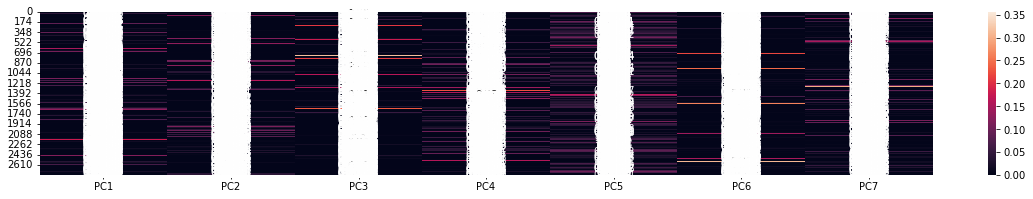

In [36]:
#2 components are more relevant
plt.figure(figsize=(20,3))

sns.heatmap(pd.DataFrame(matrix_nmf, columns=['PC1','PC2','PC3','PC4','PC5', 'PC6', 'PC7']), annot=True)

### LDA For Abstract

In [37]:
lda_model_2 = LdaMulticore(corpus_2, id2word=dictionary_2, num_topics=7, workers = 6, passes=10, random_state = 60)

In [38]:
# Let's try to visualize
lda_display_2 = pyLDAvis.gensim_models.prepare(lda_model_2, corpus_2, dictionary_2)

c:\Users\maart\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [39]:
 # Let's Visualize
pyLDAvis.display(lda_display_2)

In [40]:
topic_dist_2 = lda_model_2[corpus_2]

In [41]:
dist_2 = []

for t_2 in topic_dist_2:
    dist_2.append(t_2)  
    
# add list to the data frame
data['Topic Distribution_2'] = dist_2

C:\Users\maart\AppData\Local\Temp\ipykernel_19624\1577890192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Topic Distribution_2'] = dist_2


In [42]:
data.reset_index(inplace=True)

In [43]:
list_topicnum_2 = []
for itm in range(len(data)):
    list_topicnum_2.append(sorted(data['Topic Distribution_2'][itm], key=lambda tup: tup[1], reverse=True)[0][0])
data['topic_num_2'] = list_topicnum_2

C:\Users\maart\AppData\Local\Temp\ipykernel_19624\1200667996.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['topic_num_2'] = list_topicnum_2


In [44]:
#Checking if we need to fix the distribution of the data
data['topic_num_2'].value_counts()

4    537
2    484
5    475
1    367
3    346
6    312
0    260
Name: topic_num_2, dtype: int64

### LDA For Author Keywords

In [45]:
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=7, workers = 6, passes=10, random_state = 60)

In [46]:
# Let's try to visualize
lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)

c:\Users\maart\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


In [1]:
# Let's Visualize
pyLDAvis.display(lda_display)

In [48]:
topic_dist = lda_model[corpus]

In [49]:
dist = []

for t in topic_dist:
    dist.append(t)  
    
# add list to the data frame
data['Topic Distribution'] = dist

C:\Users\maart\AppData\Local\Temp\ipykernel_19624\843073406.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Topic Distribution'] = dist


In [50]:
data.reset_index(inplace=True)

In [51]:
list_topicnum = []
for itm in range(len(data)):
    list_topicnum.append(sorted(data['Topic Distribution'][itm], key=lambda tup: tup[1], reverse=True)[0][0])
data['topic_num'] = list_topicnum

C:\Users\maart\AppData\Local\Temp\ipykernel_19624\4231267861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['topic_num'] = list_topicnum


In [52]:
#Checking if we need to fix the distribution of the data
data['topic_num'].value_counts()

0    579
1    402
6    391
2    380
4    363
5    333
3    333
Name: topic_num, dtype: int64

In [53]:
data['topic_num'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2781 entries, 0 to 2780
Series name: topic_num
Non-Null Count  Dtype
--------------  -----
2781 non-null   int64
dtypes: int64(1)
memory usage: 21.9 KB


### Training the SML model

In [54]:
# # # Here we use oversampling, since the distribution of the y value is skewed 
# X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(data['Author Keywords'], data['topic_num'])

In [55]:
data['topic_num'].value_counts()

0    579
1    402
6    391
2    380
4    363
5    333
3    333
Name: topic_num, dtype: int64

In [56]:
# Splitting the dataset into the Training set and Test set (since we have a new output variable)
X_train, X_test, y_train, y_test = train_test_split(data['Abstract'], data['topic_num'], test_size = 0.2, random_state = 42)

In [ ]:
#Variation of the random forest, a stronger version, where the models get better over time.
from xgboost import XGBRegressor

In [ ]:
model_xgb = XGBRegressor()

#### XGB Classifier

In [ ]:
#instantiate models and "bundle up as pipeline"

tfidf = TfidfVectorizer()
svd = TruncatedSVD(n_components = 100)
cls_xg = XGBClassifier()

pipe_xg = make_pipeline(tfidf, svd, cls_xg)

In [ ]:
pipe_xg.fit(X_train,y_train) # fit model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('truncatedsvd', TruncatedSVD(n_components=100)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               objective='multi:softprob', predictor='auto',
                               random_state=0, reg_alpha=0, ...))])

In [ ]:
# evaluate model performance on training set

y_eval = pipe_xg.predict(X_train)
report = classification_report(y_train, y_eval)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       457
           1       1.00      0.99      1.00       332
           2       1.00      1.00      1.00       302
           3       0.97      1.00      0.98       262
           4       1.00      1.00      1.00       303
           5       1.00      1.00      1.00       264
           6       1.00      1.00      1.00       304

    accuracy                           1.00      2224
   macro avg       1.00      1.00      1.00      2224
weighted avg       1.00      1.00      1.00      2224



In [ ]:
# evaluate model performance on test set
#So this model has a precision score of 57%

y_pred = pipe_xg.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.48      0.60      0.53       122
           1       0.55      0.60      0.58        70
           2       0.80      0.71      0.75        78
           3       0.57      0.44      0.50        71
           4       0.41      0.42      0.41        60
           5       0.42      0.36      0.39        69
           6       0.70      0.70      0.70        87

    accuracy                           0.56       557
   macro avg       0.56      0.55      0.55       557
weighted avg       0.57      0.56      0.56       557



#### Logistic Regression

In [ ]:
# We change the cluster numbers to qualitively interpreted labels, since we can do that for the logistic regression
##This one is for the Abstract column
data['topic_num_2'] = data['topic_num_2'].replace(0,'Empirical Finance')
data['topic_num_2'] = data['topic_num_2'].replace(1,'Legal')
data['topic_num_2'] = data['topic_num_2'].replace(2,'Digital Banking')
data['topic_num_2'] = data['topic_num_2'].replace(3,'Empirical Finance')
data['topic_num_2'] = data['topic_num_2'].replace(4,'Quantitative Finance')
data['topic_num_2'] = data['topic_num_2'].replace(5,'Energy Trading')
data['topic_num_2'] = data['topic_num_2'].replace(6,'Bank Service')

##This one is for the Author Keywords column
# We change the cluster numbers to qualitively interpreted labels
data['topic_num'] = data['topic_num'].replace(0,'Cryptocurrency')
data['topic_num'] = data['topic_num'].replace(1,'AI')
data['topic_num'] = data['topic_num'].replace(2,'Fintech')
data['topic_num'] = data['topic_num'].replace(3,'Enery Trading')
data['topic_num'] = data['topic_num'].replace(4,'Credit Risk')
data['topic_num'] = data['topic_num'].replace(5,'Payment Services')
data['topic_num'] = data['topic_num'].replace(6,'Digital Banking')

C:\Users\maart\AppData\Local\Temp\ipykernel_28128\425609740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['topic_num_2'] = data['topic_num_2'].replace(0,'Empirical Finance')
C:\Users\maart\AppData\Local\Temp\ipykernel_28128\425609740.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['topic_num_2'] = data['topic_num_2'].replace(1,'Legal')
C:\Users\maart\AppData\Local\Temp\ipykernel_28128\425609740.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [ ]:
#instantiate models and "bundle up as pipeline"

tfidf = TfidfVectorizer()
cls = LogisticRegression()

pipe = make_pipeline(tfidf, cls)

In [ ]:
pipe.fit(X_train,y_train) # fit model

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [ ]:
# evaluate model performance on training set

y_eval = pipe.predict(X_train)
report = classification_report(y_train, y_eval)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.93      0.82       457
           1       0.86      0.84      0.85       332
           2       0.88      0.89      0.89       302
           3       0.86      0.73      0.79       262
           4       0.86      0.83      0.84       303
           5       0.89      0.77      0.82       264
           6       0.88      0.81      0.84       304

    accuracy                           0.84      2224
   macro avg       0.85      0.83      0.84      2224
weighted avg       0.84      0.84      0.84      2224



In [ ]:
# evaluate model performance on test set
#It turns out that the logistic regression model is better than the XGB classifier, since we get a precision score of 59%, which is 2% higher(57%)

y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.46      0.75      0.57       122
           1       0.60      0.51      0.55        70
           2       0.81      0.72      0.76        78
           3       0.60      0.45      0.52        71
           4       0.41      0.37      0.39        60
           5       0.47      0.32      0.38        69
           6       0.76      0.64      0.70        87

    accuracy                           0.57       557
   macro avg       0.59      0.54      0.55       557
weighted avg       0.59      0.57      0.56       557



In [ ]:
t1 = ['credit credit credit  ']

In [ ]:
t1_p = text_prepro(pd.Series(t1))

In [ ]:
pipe.predict (t1_p)

In [ ]:
# explain one prediction
eli5.show_prediction(pipe[1], t1_p[0], vec=pipe[0],
                     target_names=['Cryptocurrency','AI','Fintech', 'Energy Trading', 'Credit Risk', 'Payment Services', 'Digital Banking'])

In [ ]:
# overall weights (works only for linear models)
eli5.show_weights(pipe, top=20, target_names=['Cryptocurrency','AI','Fintech', 'Energy Trading', 'Credit Risk', 'Payment Services', 'Digital Banking'])


### We will use a coherence matrix Author Keywords

In [ ]:
# cm = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass')
# coherence = cm.get_coherence()  # get coherence value

In [ ]:
data.shape

In [ ]:
data = data[data["tokens"].str.len() != 0]

In [ ]:
corpus = data['tokens']

In [ ]:
data.tokens.value_counts().reset_index()

In [ ]:
dirichlet_dict = corpora.Dictionary(corpus)
bow_corpus = [dirichlet_dict.doc2bow(text) for text in corpus]

# Considering 1-15 topics, as the last is cut off
num_topics = list(range(10)[1:])
num_keywords = 15

LDA_models = {}
LDA_topics = {}
for i in num_topics:
    LDA_models[i] = LdaModel(corpus=bow_corpus,
                             id2word=dirichlet_dict,
                             num_topics=i,
                             update_every=1,
                             chunksize=len(bow_corpus),
                             passes=10,
                             alpha='auto',
                             random_state=42)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

In [ ]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [ ]:
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [ ]:
coherences = [CoherenceModel(model=LDA_models[i], texts=corpus, dictionary=dirichlet_dict, coherence='c_v').get_coherence() for i in num_topics[:-1]]

In [ ]:
num_keywords = len(coherences)

In [ ]:
coh_sta_diffs = [coherences[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
coh_sta_max = max(coh_sta_diffs)
coh_sta_max_idxs = [i for i, j in enumerate(coh_sta_diffs) if j == coh_sta_max]
ideal_topic_num_index = coh_sta_max_idxs[0] # choose less topics in case there's more than one max
ideal_topic_num = num_topics[ideal_topic_num_index]

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences, label='Topic Coherence')

ax.axvline(x=ideal_topic_num, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities), max(coherences)) + (0.10 * max(max(mean_stabilities), max(coherences)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()  

In [ ]:
lsitopics = [[word for word, prob in topic]
             for topicid, topic in lda_model.show_topics(formatted=False)]

coherence_model_lda = CoherenceModel( model=lda_model,texts=tokens, dictionary=dictionary, coherence='c_v', topics = lsitopics )
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score for Author Keywords: ', coherence_lda)

### We will use a coherence matrix Abstract Keywords

In [ ]:
data = data[data["tokens_2"].str.len() != 0]

In [ ]:
corpus_2 = data['tokens_2']

In [ ]:
data.tokens_2.value_counts().reset_index()

In [ ]:
dirichlet_dict_2 = corpora.Dictionary(corpus_2)
bow_corpus = [dirichlet_dict.doc2bow(text_2) for text_2 in corpus_2]

# Considering 1-15 topics, as the last is cut off
num_topics = list(range(10)[1:])
num_keywords = 15

LDA_models_2 = {}
LDA_topics_2 = {}
for i in num_topics:
    LDA_models[i] = LdaModel(corpus=bow_corpus,
                             id2word=dirichlet_dict_2,
                             num_topics=i,
                             update_every=1,
                             chunksize=len(bow_corpus),
                             passes=10,
                             alpha='auto',
                             random_state=42)

    shown_topics = LDA_models[i].show_topics(num_topics=i, 
                                             num_words=num_keywords,
                                             formatted=False)
    LDA_topics[i] = [[word[0] for word in topic[1]] for topic in shown_topics]

In [ ]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [ ]:
LDA_stability = {}
for i in range(0, len(num_topics)-1):
    jaccard_sims = []
    for t1, topic1 in enumerate(LDA_topics[num_topics[i]]): # pylint: disable=unused-variable
        sims = []
        for t2, topic2 in enumerate(LDA_topics[num_topics[i+1]]): # pylint: disable=unused-variable
            sims.append(jaccard_similarity(topic1, topic2))    
        
        jaccard_sims.append(sims)    
    
    LDA_stability[num_topics[i]] = jaccard_sims
                
mean_stabilities_2 = [np.array(LDA_stability[i]).mean() for i in num_topics[:-1]]

In [ ]:
coherences_2 = [CoherenceModel(model=LDA_models[i], texts=corpus_2, dictionary=dirichlet_dict_2, coherence='c_v').get_coherence() for i in num_topics[:-1]]

In [ ]:
num_keywords = len(coherences_2)

In [ ]:
coh_sta_diffs_2 = [coherences_2[i] - mean_stabilities[i] for i in range(num_keywords)[:-1]] # limit topic numbers to the number of keywords
coh_sta_max_2 = max(coh_sta_diffs_2)
coh_sta_max_idxs_2 = [i for i, j in enumerate(coh_sta_diffs_2) if j == coh_sta_max_2]
ideal_topic_num_index_2 = coh_sta_max_idxs_2[0] # choose less topics in case there's more than one max
ideal_topic_num_2 = num_topics[ideal_topic_num_index_2]

In [ ]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x=num_topics[:-1], y=mean_stabilities_2, label='Average Topic Overlap')
ax = sns.lineplot(x=num_topics[:-1], y=coherences_2, label='Topic Coherence')

ax.axvline(x=ideal_topic_num_2, label='Ideal Number of Topics', color='black')
ax.axvspan(xmin=ideal_topic_num_2 - 1, xmax=ideal_topic_num + 1, alpha=0.5, facecolor='grey')

y_max = max(max(mean_stabilities_2), max(coherences_2)) + (0.10 * max(max(mean_stabilities_2), max(coherences_2)))
ax.set_ylim([0, y_max])
ax.set_xlim([1, num_topics[-1]-1])
                
ax.axes.set_title('Model Metrics per Number of Topics', fontsize=25)
ax.set_ylabel('Metric Level', fontsize=20)
ax.set_xlabel('Number of Topics', fontsize=20)
plt.legend(fontsize=20)
plt.show()  

In [ ]:
ldatopics_2 = [[word for word, prob in topic]
             for topicid, topic in lda_model_2.show_topics(formatted=False)]

coherence_model_lda_2 = CoherenceModel( model=lda_model_2,texts=tokens_2, dictionary=dictionary_2, coherence='c_v', topics = ldatopics_2 )
coherence_lda_2 = coherence_model_lda_2.get_coherence()
print('\nCoherence Score for Abstract: ', coherence_lda_2)